In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras import datasets, layers, models

The core data structures of Keras are layers and models.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
(X_train, y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [8]:
len(X_train)

60000

In [10]:
len(X_test)

10000

In [12]:
X_train[0].shape

(28, 28)

In [93]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [20]:
X_train.shape

(60000, 28, 28)

In [16]:
y_train.shape

(60000,)

In [50]:
def plot_sample(X,y,index):
    plt.figure(figsize=(2,2))
    plt.imshow(X[index])
    plt.xlabel(y[index])
    plt.show()

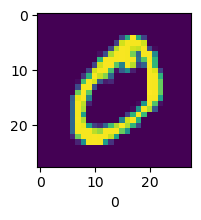

In [52]:
plot_sample(X_train,y_train,1)

In [58]:
plt.matshow(X_train[10])


In [60]:
y_train[10]

3

In [62]:
X_train=X_train/255  # scale between 0 to 1 
X_test=X_test/255

In [64]:
x_train_flattened = X_train.reshape(len(X_train),28*28)
x_test_flattened = X_test.reshape(len(X_test),28*28)

In [66]:
model=keras.Sequential([    
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flattened, y_train, epochs=5)

C:\Users\mukth\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8113 - loss: 0.7275
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9140 - loss: 0.3066
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9217 - loss: 0.2802
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9230 - loss: 0.2748
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9259 - loss: 0.2664



 sequential is a type of model which means stack of layers in the network
 dense means all the neuron at one layer is connected every other nueron in other layer
 """keras.layers.Dense(10,input_shape=(784,),activation='sigmoid)"""
 here 10 is output neuron
 input_shape is number of input neurons

# Define Sequential model with 3 layers
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="layer3"),
    ]
)
# Call model on a test input
x = tf.ones((3, 3))
y = model(x)

both are the same, how the actual sequential model works (instead of using a sequential model we can use this)

# Create 3 layers
layer1 = layers.Dense(2, activation="relu", name="layer1")
layer2 = layers.Dense(3, activation="relu", name="layer2")
layer3 = layers.Dense(4, name="layer3")

# Call layers on a test input
x = tf.ones((3, 3))
y = layer3(layer2(layer1(x)))

In [67]:
model.evaluate(x_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9151 - loss: 0.3074


[0.27058255672454834, 0.925000011920929]

In [68]:
y_predicted=model.predict(x_test_flattened)
y_predicted[0]  # predict the probability of occurance of number

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([3.2836348e-02, 5.7709286e-07, 4.1863818e-02, 9.5991063e-01,
       2.8632844e-03, 1.2071458e-01, 2.9788980e-06, 9.9988759e-01,
       1.2439137e-01, 7.3385215e-01], dtype=float32)

In [69]:
np.argmax(y_predicted[0]) #calculate the max probability index

7

In [70]:
plt.matshow(X_test[1])

In [71]:
np.argmax(y_predicted[1])

2

In [72]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]

In [73]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    0,    2,    0,    4,    5,    2,    1,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [  10,    9,  907,   20,   11,    4,   13,   11,   43,    4],
       [   5,    0,   12,  920,    0,   24,    2,   14,   26,    7],
       [   2,    1,    2,    1,  920,    0,   11,    4,    8,   33],
       [  12,    2,    1,   34,   12,  769,   17,    9,   31,    5],
       [  14,    3,    2,    2,    7,   11,  915,    2,    2,    0],
       [   2,    5,   20,    6,    6,    0,    0,  963,    4,   22],
       [  10,    7,    5,   19,    9,   27,   10,   13,  867,    7],
       [  11,    7,    1,    9,   27,    6,    0,   28,    7,  913]])>

In [74]:
import seaborn as sns
plt.figure(figsize=(10,7))
#cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
sns.heatmap(cm,annot=True,fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('truth')

Text(95.72222222222221, 0.5, 'truth')

## CNN

In [97]:
cnn=models.Sequential([
    #CNN
    layers.Conv2D(filters=32, activation='relu', kernel_size=(3,3),input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, activation='relu', kernel_size=(3,3)),
    layers.MaxPooling2D((2,2)),
    
 #It will figure out the filters
    
    #Dense
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])
cnn.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [99]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 17ms/step - accuracy: 0.8906 - loss: 0.3478
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9852 - loss: 0.0494
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9906 - loss: 0.0310
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9932 - loss: 0.0213
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9951 - loss: 0.0171


In [100]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9898 - loss: 0.0296


[0.02509564720094204, 0.9921000003814697]

In [105]:
from sklearn.metrics import classification_report, confusion_matrix 
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(i) for i in y_pred]
print("Classification report: \n",classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

